# PTEN in Endo and GBM

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import gseapy as gp
import re
import sys 

import cptac
import cptac.utils as u

import sys
sys.path.append('C:\\Users\\brittany henderson\\GitHub\\WhenMutationsDontMatter\\')
import plot_utils as p

In [2]:
gbm = cptac.Gbm()
endo = cptac.Endometrial()

In [3]:
cancer1 = "GBM"
cancer2 = "Endometrial"
gene = 'PTEN'

In [4]:
#GBM ttest
# Step 1 - Create dataframe in order to do comparisons with wrap_ttest
prot = gbm.get_proteomics()
prot_list = list(prot.columns)
prot_and_mutations = gbm.join_omics_to_mutations(
    mutations_genes = [gene], omics_df_name = 'proteomics', omics_genes = prot_list)  

# Step 2 - Create binary column 
prot_and_mutations['binary_mutations'] = np.where(
            prot_and_mutations[gene+'_Mutation_Status'] == 'Wildtype_Tumor', 'Wildtype', 'Mutated')

# Step 3 - Format the dataframe correctly for the T-test(just omics and binary columns for tumors)
tumors = prot_and_mutations[prot_and_mutations.Sample_Status == 'Tumor'] #drop Normal samples
columns_to_drop = [gene+"_Mutation", gene+"_Location", gene+"_Mutation_Status", "Sample_Status"]
mut_status = tumors.drop(columns_to_drop, axis = 1)
mut_status = mut_status.dropna(axis=1,how='all')

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 82 samples for the PTEN gene (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 6)


In [6]:
col_list = list(mut_status.columns)
col_list.remove('binary_mutations')

print("Doing t-test comparisons for GBM\n")

# Call wrap_ttest, pass in formatted dataframe
wrap_results = u.wrap_ttest(mut_status, 'binary_mutations', col_list, return_all=True)
wrap_results

Doing t-test comparisons for GBM

No significant comparisons.


,Comparison,P_Value
0,PTEN_proteomics,0.000032
1,CALD1_proteomics,0.000227
2,FLNC_proteomics,0.000240
3,ERBB2_proteomics,0.000491
4,MAPK8IP3_proteomics,0.000499
...,...,...
11136,ZNF207_proteomics,0.998493
11137,POLB_proteomics,0.999058
11138,TIMM21_proteomics,0.999198
11139,WDR24_proteomics,0.999279


In [17]:
n = mut_status.iloc[:,:-1000]
p.wrap_lin_regression(n,'PTEN_proteomics')



,Comparison,Slope,R_squared,P_value
189,HSPA12A_proteomics,-0.147102,0.0769816227508644,8.743230e-12
14,ADO_proteomics,-0.147102,0.0769816227508644,1.354484e-10
62,CABLES1_proteomics,-0.147102,0.0769816227508644,1.695806e-10
336,PRKCB_proteomics,-0.147102,0.0769816227508644,2.042778e-10
34,ATP2B1_proteomics,-0.147102,0.0769816227508644,4.199477e-10
...,...,...,...,...
74,CALM2_proteomics,-0.147102,0.0769816227508644,4.826907e-06
414,SLC8A1_proteomics,-0.147102,0.0769816227508644,4.833859e-06
63,CACNA1A_proteomics,-0.147102,0.0769816227508644,4.867714e-06
313,PIP5K1A_proteomics,-0.147102,0.0769816227508644,4.875470e-06


In [6]:
wrap_results.loc[wrap_results['Comparison'] == gene+"_proteomics"]

,Comparison,P_Value
0,PTEN_proteomics,0.000032


In [7]:
# endo ttest
# Step 1 - Create dataframe in order to do comparisons with wrap_ttest
prot2 = endo.get_proteomics()
prot_list2 = list(prot2.columns)
prot_and_mutations = endo.join_omics_to_mutations(
    mutations_genes = [gene], omics_df_name = 'proteomics', omics_genes = prot_list2)  

# Step 2 - Create binary column 
prot_and_mutations['binary_mutations'] = np.where(
            prot_and_mutations[gene+'_Mutation_Status'] == 'Wildtype_Tumor', 'Wildtype', 'Mutated')

# Step 3 - Format the dataframe correctly for the T-test(just omics and binary columns for tumors)
tumors = prot_and_mutations[prot_and_mutations.Sample_Status == 'Tumor'] #drop Normal samples
columns_to_drop = [gene+"_Mutation", gene+"_Location", gene+"_Mutation_Status", "Sample_Status"]
mut_status = tumors.drop(columns_to_drop, axis = 1)
mut_status2 = mut_status.dropna(axis=1,how='all')

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 69 samples for the PTEN gene (C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\ipykernel_launcher.py, line 6)


In [8]:
col_list2 = list(mut_status2.columns)
col_list2.remove('binary_mutations')

print("Doing t-test comparisons for Endometrial")

# Call wrap_ttest, pass in formatted dataframe
wrap_results2 = u.wrap_ttest(mut_status2, 'binary_mutations', col_list2, return_all=True)

Doing t-test comparisons for Endometrial
78 significant comparisons!


In [ ]:
wrap_results2.loc[wrap_results2['Comparison'] == gene+"_proteomics"]

,Comparison,P_Value
7303,PTEN_proteomics,0.018255


Visualize all P-values

In [ ]:
pathways = pd.read_excel(R"E:\Users\brittany henderson\Documents\Junior BYU\WikiPathwaysData.xlsx")


In [ ]:
f = pathways[['Gene','Focal Adhesion-PI3K-Akt-mTOR-signaling pathway']]#'PDGF Pathway','NRF2-ARE regulation','Vitamin D Receptor Pathway', 'Serotonin Transporter Activity']]
f

In [12]:
pten_interacting = ['MDM2', 'CSNK2A1', 'PDGFRB', 'PIK3R2', 'PIK3C3', 'CSNK2A2', 'SLC9A3R1', 'PIK3R3', 'USP13', 'PIK3CA', 'TP53', 'EGFR', 'PIK3CB', 'PTK2', 'USP7', 'XIAP', 'PTEN', 'PREX2', 'MAST2', 'PIK3CD', 'ROCK1', 'SHC1', 'NEDD4', 'INPP4B', 'PIK3R1', 'AKT1', 'MVP', 'MAGI3']
interacting_df = pd.DataFrame(pten_interacting)

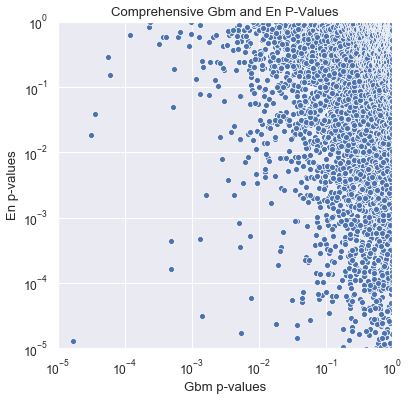

In [15]:
n = p.binary_pval_plot(wrap_results, "Gbm", wrap_results2, "En")
                     #,save_file_name= 'new')
